In [1]:
import textacy
import spacy
import numpy as np
import matplotlib.pyplot as plt
import es_core_news_sm # python -m spacy download es   (no anda con internet lento)
from wordcloud import WordCloud # conda install -c conda-forge wordcloud
import re
import operator

nlp_wc =  es_core_news_sm.load(disable=['parser', 'tagger', 'ner', 'textcat']) # for word count task
nlp =  es_core_news_sm.load()

In [2]:
emdv_lines = [] # el mercader de venecia
macb_lines = [] # macbeth
royj_lines = [] # romeo y julieta
otel_lines = [] # otelo
with open ('../input/shakespeare.txt', 'rt') as file:
    for _ in range(255):
        next(file)
    for _ in range(3927):
        line = next(file)
        emdv_lines.append(line)
    for _ in range(59): # skip title and characters introduction.
        next(file)
    for _ in range(3589):
        line = next(file)
        macb_lines.append(line)
    for _ in range(66): # skip title and characters introduction.
        next(file)
    for _ in range(4756):
        line = next(file)
        royj_lines.append(line)
    for _ in range(58): # skip title and characters introduction.
        next(file)
    for _ in range(6256):
        line = next(file)
        otel_lines.append(line)

In [3]:
def preprocess_for_term_count(lines_list):
    ret_string = ''.join(lines_list)
    ret_string = re.sub(r'\W[A-Z]+\W|\=', '', ret_string, re.UNICODE) # remove dialog references and equals signs
    ret_string = ret_string.lower() # convert to lower case
    return ret_string

def terms_count(lines_list):
    text_str = preprocess_for_term_count(lines_list)
    spDoc = nlp_wc(text_str)
    ttDoc = textacy.Doc(spDoc, lang='es')
    terms = ttDoc.to_bag_of_terms(ngrams=1, as_strings=True)
    terms = [(a, b) for a, b in terms.items() if len(a) >= 2] # return only words with more than 2 characters
    terms = sorted(terms, key=operator.itemgetter(1), reverse=True)
    return terms


In [4]:
def preprocess_for_ner(lines_list):
    ret_string = ''.join(lines_list)
    ret_string = re.sub(r'=(.+)\.=', '', ret_string) # remover lugar de la escena
    ret_string = re.sub(r'\n\n', '. ', ret_string)
    ret_string = re.sub(r'\n', ' ', ret_string)
    ret_string = re.sub(r'\W[A-Z]+\W', '', ret_string)
    ret_string = re.sub(r'\.\.', '', ret_string)
    return ret_string

def ner(lines_list):
    text_str = preprocess_for_ner(emdv_lines)
    spDoc = nlp(text_str)
    ttDoc = textacy.Doc(spDoc, lang='es')
    net = textacy.extract.named_entities(ttDoc, include_types=['PERSON', 'ORG'])
    return net


In [5]:
emdv_terms = terms_count(emdv_lines)
macb_terms = terms_count(macb_lines)
royj_terms = terms_count(royj_lines)
otel_terms = terms_count(otel_lines)
all_terms = terms_count(emdv_lines + macb_lines + royj_lines + otel_lines)

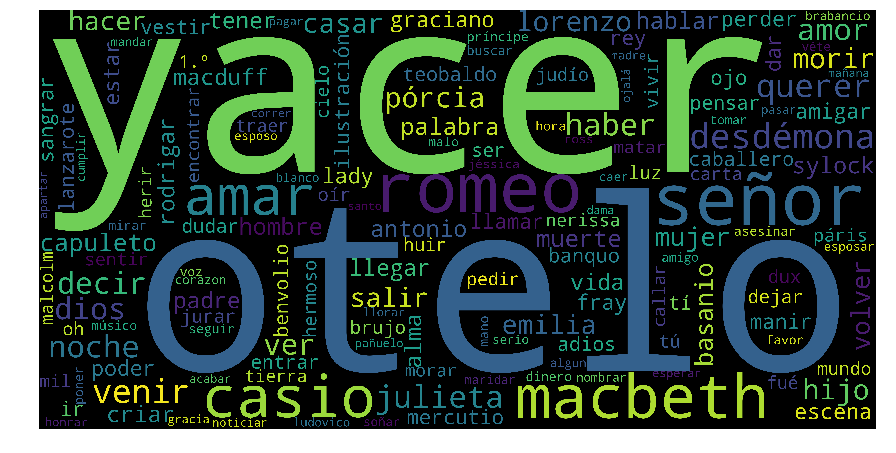

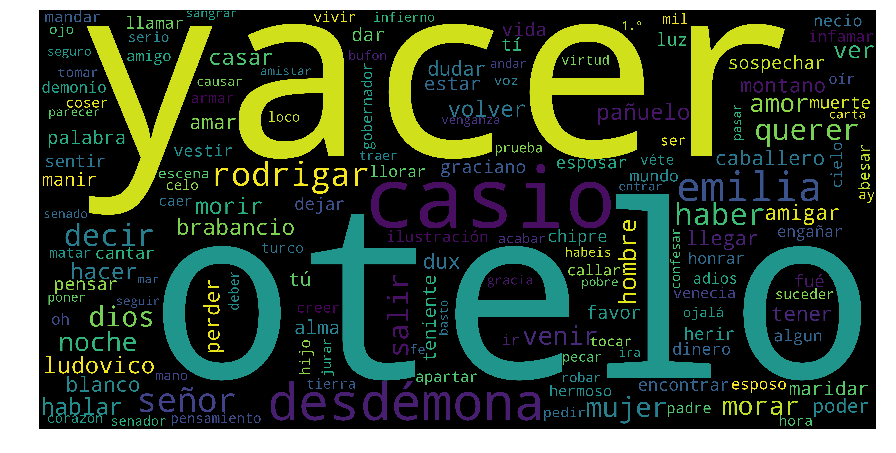

In [6]:
# generators...
emdv_terms = terms_count(emdv_lines)
macb_terms = terms_count(macb_lines)
royj_terms = terms_count(royj_lines)
otel_terms = terms_count(otel_lines)
all_terms = terms_count(emdv_lines + macb_lines + royj_lines + otel_lines)

def plot_wc_frequencies(terms):
    wc = WordCloud(width=8000, height=4000, max_words=150).generate_from_frequencies(dict(terms))
    plt.figure(figsize=(15, 15))
    plt.imshow(wc)
    plt.axis("off")
plot_wc_frequencies(all_terms)
plot_wc_frequencies(otel_terms)

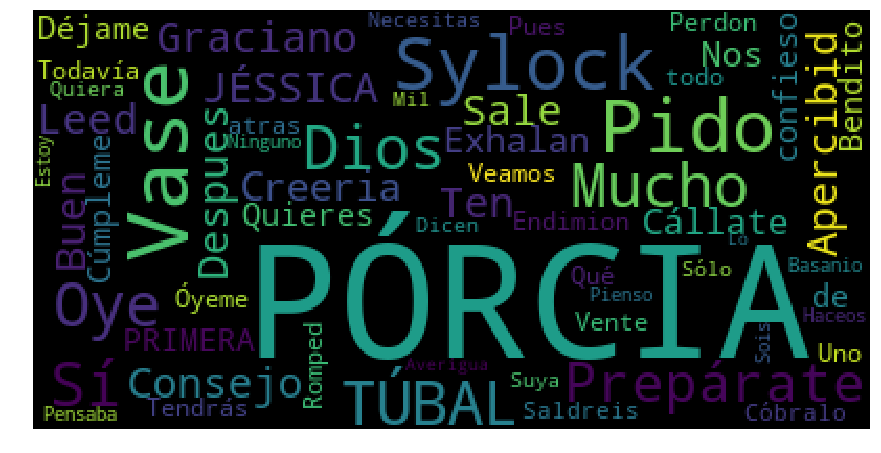

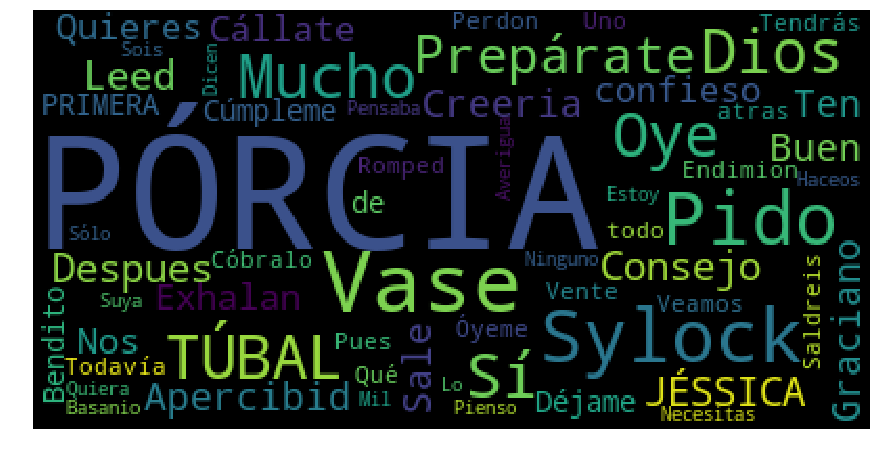

In [7]:
emdv_nent = ner(emdv_lines)
macb_nent = ner(macb_lines)
royj_nent = ner(royj_lines)
otel_nent = ner(otel_lines)
all_nent = ner(emdv_lines + macb_lines + royj_lines + otel_lines)

def plot_wc_nent(nent_gen):
    wc = WordCloud().generate(' '.join((entity.text for entity in nent_gen)))
    plt.figure(figsize=(15, 15))
    plt.imshow(wc)
    plt.axis("off")
plot_wc_nent(all_nent)
plot_wc_nent(otel_nent)